# Get data from [Wordometer](https://www.worldometers.info/coronavirus/)

## Installation

Install ***covid_daily/*** Python Package directory via pip on the terminal. 

In [ ]:
pip install covid_daily

### Retrieve Malaysia's daily case data

Retrieve data which returns a pandas.DataFrame containing all the information provided by Worldometers related to the daily new cases of infected people because of the COVID-19 in Malaysia.

In [1]:
import covid_daily

new_cases = covid_daily.data(country='malaysia', chart='graph-cases-daily', as_json=False)
death=covid_daily.data(country='malaysia', chart='graph-deaths-daily', as_json=False)

# Preprocessing data

In [2]:
#View new cases data object
new_cases.head()

,Novel Coronavirus Daily Cases
Date,
2020-02-15,NaN
2020-02-16,0.0
2020-02-17,0.0
2020-02-18,0.0
2020-02-19,0.0


In [3]:
#Import packages and classes
import numpy as np
import pandas as pd

In [4]:
#Set the index to become the ‘Date’ column
new_cases=new_cases.reset_index()
new_cases.head()

,Date,Novel Coronavirus Daily Cases
0,2020-02-15,NaN
1,2020-02-16,0.0
2,2020-02-17,0.0
3,2020-02-18,0.0
4,2020-02-19,0.0


In [5]:
#check data object type
new_cases.dtypes

Date                             datetime64[ns]
Novel Coronavirus Daily Cases           float64
dtype: object

In [6]:
#rename header
new_cases = new_cases.rename(columns={'Novel Coronavirus Daily Cases': 'Daily New Cases'})
new_cases.head()


,Date,Daily New Cases
0,2020-02-15,NaN
1,2020-02-16,0.0
2,2020-02-17,0.0
3,2020-02-18,0.0
4,2020-02-19,0.0


# Understanding the dataset
Create the first scatter plot, and display the the number of daily new positive cases variable for estimating the epidemic progression

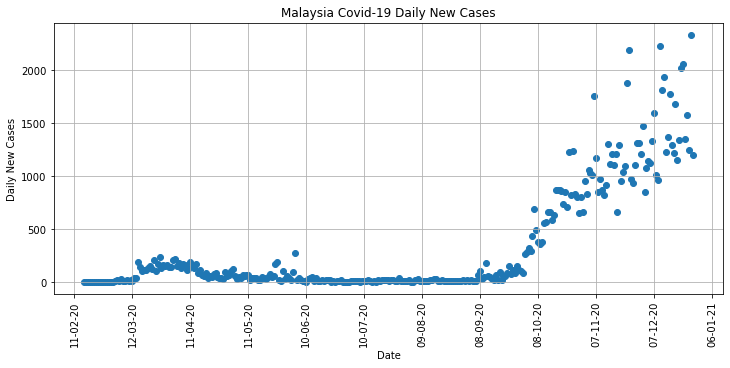

In [7]:
#Import packages and classes
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

dates = new_cases['Date']
date_format = [pd.to_datetime(d) for d in dates]
variable = 'Daily New Cases'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,new_cases[variable])
ax.set(xlabel='Date',ylabel=variable,title='Malaysia Covid-19 Daily New Cases')
date_form = DateFormatter('%d-%m-%y')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 30))
plt.xticks(rotation=90)
plt.show()

In [8]:
# Converting 'date' column to appropriate datatype
new_cases['Date']=pd.to_datetime(new_cases['Date'])
new_cases.Date=pd.to_datetime(new_cases.Date)
new_cases.dtypes
new_cases.Date.head()

0   2020-02-15
1   2020-02-16
2   2020-02-17
3   2020-02-18
4   2020-02-19
Name: Date, dtype: datetime64[ns]

# Data selection

From this graph, there is a sharp indentation starting 16 september 2020. Therefore, we will select the data to develop our model starting on that date.

In [9]:
#Select start and end date 
start_date = '2020-09-16'
end_date = '2020-12-27'

In [10]:
# Filters out dates, keeps only the dates of interest (not used)
start_date_time = pd.to_datetime(start_date)
end_date_time = pd.to_datetime(end_date)
filtered_chart = new_cases.loc[(new_cases['Date'] > start_date_time) & (new_cases['Date'] < end_date_time)]
filtered_chart.dtypes
filtered_chart.head()

,Date,Daily New Cases
215,2020-09-17,21.0
216,2020-09-18,95.0
217,2020-09-19,20.0
218,2020-09-20,52.0
219,2020-09-21,57.0


In [11]:
# Store the columns into an array
new_cases = np.array(filtered_chart['Daily New Cases'])
date_timeline = np.array(filtered_chart['Date']) 

count = 0
index = []
for i in date_timeline: 
    count += 1
    
for i in range(0, count): 
    index.append(i)

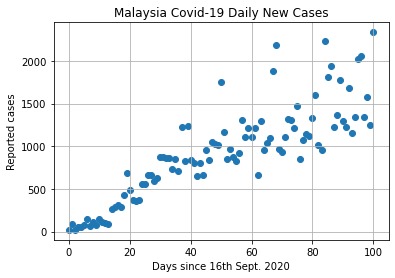

In [12]:
# Plot daily cases since 16th Sept. 2020
plt.title('Malaysia Covid-19 Daily New Cases')
plt.ylabel("Reported cases")
plt.xlabel("Days since 16th Sept. 2020")
plt.scatter(index, new_cases)
plt.grid()
plt.show()

In [13]:
df = pd.DataFrame(list(zip(index, new_cases)),columns = ['No. of Days', 'Cases'])
df.head()

,No. of Days,Cases
0,0,21.0
1,1,95.0
2,2,20.0
3,3,52.0
4,4,57.0


#  Create a model and fit it

In [14]:
from sklearn.linear_model import LinearRegression
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [15]:
#Splitting the dataset to Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [16]:
#Training the model on the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

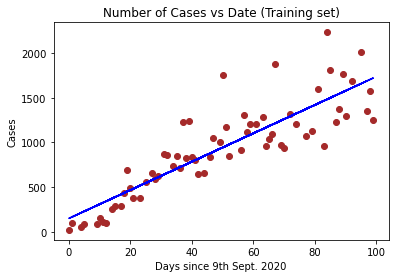

In [17]:
#Visualizing Training Set Result
plt.scatter(X_train, y_train, color = 'brown')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Number of Cases vs Date (Training set)')
plt.xlabel('Days since 9th Sept. 2020')
plt.ylabel('Cases')
plt.show()

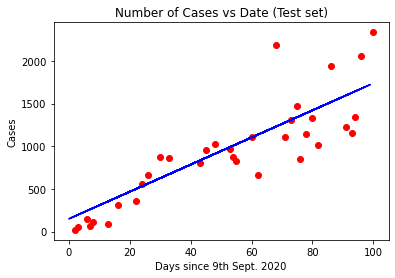

In [18]:
#Visualizing Test Set Result
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Number of Cases vs Date (Test set)')
plt.xlabel('Days since 9th Sept. 2020')
plt.ylabel('Cases')
plt.show()

In [19]:
# find the coefficients and intercept of the model
print('Coefficient: ',regressor.coef_)
print('Intercept: ',regressor.intercept_)

Coefficient:  [15.87791176]
Intercept:  149.94153988383994


Therefore, the equation of simple linear regression model is:

$$\textrm{Cases} = 15.87791176 \times \textrm{No. of days} + 149.94153988383994$$

# Making Predictions
Use test data and see how accuratel algorithm predicts the percentage score.

In [20]:
#apply the trained model to make predictions on the test set
y_pred = regressor.predict(X_test)

In [21]:
#create dataframe
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.head()

,Actual,Predicted
0,660.0,562.767246
1,1937.0,1515.441951
2,20.0,181.697363
3,822.0,1023.226687
4,1472.0,1340.784922


In [22]:
#Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 235.07879105401713
Mean Squared Error: 95804.2446107749
Root Mean Squared Error: 309.52260759236134
